In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os
from util import HISTORICAL_RULES_FILE , RESOURCE_DIR, IMAGES_DIR 
#pip install mlxtend
from mlxtend.frequent_patterns import apriori, association_rules
projectsWithBD = 234

This script analyse this association rules find in the last version

In [2]:
df = pd.read_excel(RESOURCE_DIR + os.sep + 'historical_rulesv10.xlsx', keep_default_na=False) #'seq_patterns/testes/historical_rules_commit10_197reg_021.xlsx'
#df = pd.read_excel(HISTORICAL_RULES_FILE , keep_default_na=False)
df2 = df.copy()
len(df)
#df.head()
df2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,frozenset({'Ingres'}),frozenset({'Firebird'}),0.021645,0.047619,0.021645,1.000000,21.000000,0.020614,inf,1,1
1,frozenset({'Firebird'}),frozenset({'Ingres'}),0.047619,0.021645,0.021645,0.454545,21.000000,0.020614,1.793651,1,1
2,frozenset({'Informix'}),frozenset({'MS Access'}),0.043290,0.030303,0.021645,0.500000,16.500000,0.020333,1.939394,1,1
3,frozenset({'MS Access'}),frozenset({'Informix'}),0.030303,0.043290,0.021645,0.714286,16.500000,0.020333,3.348485,1,1
4,frozenset({'SAP Adaptive Server'}),frozenset({'SAP SQL Anywhere'}),0.060606,0.064935,0.060606,1.000000,15.400000,0.056671,inf,1,1
...,...,...,...,...,...,...,...,...,...,...,...
503,frozenset({'H2'}),frozenset({'DynamoDB'}),0.389610,0.125541,0.056277,0.144444,1.150575,0.007365,1.022095,1,1
504,frozenset({'Redis'}),frozenset({'SAP SQL Anywhere'}),0.350649,0.064935,0.025974,0.074074,1.140741,0.003205,1.009870,1,1
505,frozenset({'SAP SQL Anywhere'}),frozenset({'Redis'}),0.064935,0.350649,0.025974,0.400000,1.140741,0.003205,1.082251,1,1
506,frozenset({'Redis'}),frozenset({'SAP Adaptive Server'}),0.350649,0.060606,0.021645,0.061728,1.018519,0.000394,1.001196,1,1


In [3]:
df['antecedents'] = df['antecedents'].astype(str)
df['consequents'] = df['consequents'].astype(str)

In [4]:
#Extract the word "frozenset" of the dataframe
df['antecedents'] = df['antecedents'].apply(lambda x: x[len('frozenset({"'):-3])
df['consequents'] = df['consequents'].apply(lambda x: x[len('frozenset({"'):-3])
df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,Ingres,Firebird,0.021645,0.047619,0.021645,1.000000,21.000000,0.020614,inf,1,1
1,Firebird,Ingres,0.047619,0.021645,0.021645,0.454545,21.000000,0.020614,1.793651,1,1
2,Informix,MS Access,0.043290,0.030303,0.021645,0.500000,16.500000,0.020333,1.939394,1,1
3,MS Access,Informix,0.030303,0.043290,0.021645,0.714286,16.500000,0.020333,3.348485,1,1
4,SAP Adaptive Server,SAP SQL Anywhere,0.060606,0.064935,0.060606,1.000000,15.400000,0.056671,inf,1,1
...,...,...,...,...,...,...,...,...,...,...,...
503,H2,DynamoDB,0.389610,0.125541,0.056277,0.144444,1.150575,0.007365,1.022095,1,1
504,Redis,SAP SQL Anywhere,0.350649,0.064935,0.025974,0.074074,1.140741,0.003205,1.009870,1,1
505,SAP SQL Anywhere,Redis,0.064935,0.350649,0.025974,0.400000,1.140741,0.003205,1.082251,1,1
506,Redis,SAP Adaptive Server,0.350649,0.060606,0.021645,0.061728,1.018519,0.000394,1.001196,1,1


In [5]:
#Create a new columns
df.insert(3,'antecedent_sup_abs', 0, True)
df.insert(5,'consequent_sup_abs', 0, True)
df.insert(7,'support_abs', 0, True)

#Converting the support relative values in absolut values
df['antecedent_sup_abs'] = (df['antecedent support']*projectsWithBD)
df['consequent_sup_abs'] = (df['consequent support']*projectsWithBD)
df['support_abs'] = (df['support']*projectsWithBD)
df

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,Ingres,Firebird,0.021645,5.064935,0.047619,11.142857,0.021645,5.064935,1.000000,21.000000,0.020614,inf,1,1
1,Firebird,Ingres,0.047619,11.142857,0.021645,5.064935,0.021645,5.064935,0.454545,21.000000,0.020614,1.793651,1,1
2,Informix,MS Access,0.043290,10.129870,0.030303,7.090909,0.021645,5.064935,0.500000,16.500000,0.020333,1.939394,1,1
3,MS Access,Informix,0.030303,7.090909,0.043290,10.129870,0.021645,5.064935,0.714286,16.500000,0.020333,3.348485,1,1
4,SAP Adaptive Server,SAP SQL Anywhere,0.060606,14.181818,0.064935,15.194805,0.060606,14.181818,1.000000,15.400000,0.056671,inf,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,H2,DynamoDB,0.389610,91.168831,0.125541,29.376623,0.056277,13.168831,0.144444,1.150575,0.007365,1.022095,1,1
504,Redis,SAP SQL Anywhere,0.350649,82.051948,0.064935,15.194805,0.025974,6.077922,0.074074,1.140741,0.003205,1.009870,1,1
505,SAP SQL Anywhere,Redis,0.064935,15.194805,0.350649,82.051948,0.025974,6.077922,0.400000,1.140741,0.003205,1.082251,1,1
506,Redis,SAP Adaptive Server,0.350649,82.051948,0.060606,14.181818,0.021645,5.064935,0.061728,1.018519,0.000394,1.001196,1,1


In [6]:
df2 = df.copy()
df2

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,Ingres,Firebird,0.021645,5.064935,0.047619,11.142857,0.021645,5.064935,1.000000,21.000000,0.020614,inf,1,1
1,Firebird,Ingres,0.047619,11.142857,0.021645,5.064935,0.021645,5.064935,0.454545,21.000000,0.020614,1.793651,1,1
2,Informix,MS Access,0.043290,10.129870,0.030303,7.090909,0.021645,5.064935,0.500000,16.500000,0.020333,1.939394,1,1
3,MS Access,Informix,0.030303,7.090909,0.043290,10.129870,0.021645,5.064935,0.714286,16.500000,0.020333,3.348485,1,1
4,SAP Adaptive Server,SAP SQL Anywhere,0.060606,14.181818,0.064935,15.194805,0.060606,14.181818,1.000000,15.400000,0.056671,inf,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,H2,DynamoDB,0.389610,91.168831,0.125541,29.376623,0.056277,13.168831,0.144444,1.150575,0.007365,1.022095,1,1
504,Redis,SAP SQL Anywhere,0.350649,82.051948,0.064935,15.194805,0.025974,6.077922,0.074074,1.140741,0.003205,1.009870,1,1
505,SAP SQL Anywhere,Redis,0.064935,15.194805,0.350649,82.051948,0.025974,6.077922,0.400000,1.140741,0.003205,1.082251,1,1
506,Redis,SAP Adaptive Server,0.350649,82.051948,0.060606,14.181818,0.021645,5.064935,0.061728,1.018519,0.000394,1.001196,1,1


Top 10 BDs Session
Presentation of the 10 most frequent BDs (consequents=antecedents).

In [7]:
rules1b = df2.sort_values(['support',], ascending=[False])
rules1b

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
412,MySQL,PostgreSQL,0.484848,113.454545,0.402597,94.207792,0.329004,76.987013,0.678571,1.685484,0.133806,1.858586,1,1
413,PostgreSQL,MySQL,0.402597,94.207792,0.484848,113.454545,0.329004,76.987013,0.817204,1.685484,0.133806,2.818182,1,1
453,MySQL,H2,0.484848,113.454545,0.389610,91.168831,0.290043,67.870130,0.598214,1.535417,0.101141,1.519192,1,1
452,H2,MySQL,0.389610,91.168831,0.484848,113.454545,0.290043,67.870130,0.744444,1.535417,0.101141,2.015810,1,1
358,PostgreSQL,Oracle,0.402597,94.207792,0.341991,80.025974,0.264069,61.792208,0.655914,1.917926,0.126384,1.912338,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,Google Cloud Datastore,SAP SQL Anywhere,0.129870,30.389610,0.064935,15.194805,0.021645,5.064935,0.166667,2.566667,0.013212,1.122078,1,1
220,H2,Ingres,0.389610,91.168831,0.021645,5.064935,0.021645,5.064935,0.055556,2.566667,0.013212,1.035905,1,1
221,Ingres,H2,0.021645,5.064935,0.389610,91.168831,0.021645,5.064935,1.000000,2.566667,0.013212,inf,1,1
226,PostgreSQL,Ingres,0.402597,94.207792,0.021645,5.064935,0.021645,5.064935,0.053763,2.483871,0.012931,1.033943,1,1


In [8]:
rules1a = df2[(df2['antecedent support'] >= 0.07)] #& (df['confidence'] > 0.7) ]
#rules2 = rules2.sort_values(['consequent support','support'], ascending=[False,False])
rules1a = rules1a.groupby('antecedents').mean().sort_values(['antecedent support',], ascending=[False])
rules1a

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
antecedents,,,,,,,,,,,,
MySQL,0.484848,113.454545,0.115487,27.023879,0.094261,22.056975,0.194412,1.814098,0.038267,1.138424,1.0,1.0
PostgreSQL,0.402597,94.207792,0.118140,27.644742,0.088535,20.717218,0.219910,2.068051,0.040972,1.216320,1.0,1.0
H2,0.389610,91.168831,0.131954,30.877345,0.086420,20.222222,0.221811,1.856141,0.035009,1.173338,1.0,1.0
Redis,0.350649,82.051948,0.140693,32.922078,0.078644,18.402597,0.224280,1.831537,0.029310,1.146169,1.0,1.0
Oracle,0.341991,80.025974,0.125093,29.271832,0.082848,19.386476,0.242252,2.260817,0.040067,1.253321,1.0,1.0
HyperSQL,0.242424,56.727273,0.154073,36.053129,0.075364,17.635183,0.310877,2.638611,0.038013,1.367468,1.0,1.0
MS SQL Server,0.238095,55.714286,0.130019,30.424541,0.071503,16.731751,0.300313,2.798609,0.040546,1.871372,1.0,1.0
MongoDB,0.186147,43.558442,0.146320,34.238961,0.055758,13.047273,0.299535,2.774050,0.028520,1.310974,1.0,1.0
IBM DB2,0.134199,31.402597,0.157812,36.927981,0.060409,14.135773,0.450147,4.134152,0.039231,NaN,1.0,1.0


Top 10 BDs Session
Presentation of the 10 most frequent BDs (consequents=antecedents).

In [9]:
rules1 = df2[(df2['consequent support'] >= 0.13)] #0.07)] #& (df['confidence'] > 0.7) ]
#rules2 = rules2.sort_values(['consequent support','support'], ascending=[False,False])
rules1 = rules1.groupby('consequents').mean().sort_values(['consequent support',], ascending=[False])
rules1

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
consequents,,,,,,,,,,,,
MySQL,0.115487,27.023879,0.484848,113.454545,0.094261,22.056975,0.879563,1.814098,0.038267,NaN,1.0,1.0
PostgreSQL,0.118140,27.644742,0.402597,94.207792,0.088535,20.717218,0.832592,2.068051,0.040972,NaN,1.0,1.0
H2,0.131954,30.877345,0.389610,91.168831,0.086420,20.222222,0.723172,1.856141,0.035009,NaN,1.0,1.0
Redis,0.140693,32.922078,0.350649,82.051948,0.078644,18.402597,0.642227,1.831537,0.029310,NaN,1.0,1.0
Oracle,0.125093,29.271832,0.341991,80.025974,0.082848,19.386476,0.773180,2.260817,0.040067,NaN,1.0,1.0
HyperSQL,0.154073,36.053129,0.242424,56.727273,0.075364,17.635183,0.639663,2.638611,0.038013,NaN,1.0,1.0
MS SQL Server,0.130019,30.424541,0.238095,55.714286,0.071503,16.731751,0.666335,2.798609,0.040546,NaN,1.0,1.0
MongoDB,0.146320,34.238961,0.186147,43.558442,0.055758,13.047273,0.516382,2.774050,0.028520,NaN,1.0,1.0
IBM DB2,0.157812,36.927981,0.134199,31.402597,0.060409,14.135773,0.554800,4.134152,0.039231,NaN,1.0,1.0


In [10]:
rules1c = df2.groupby(['antecedents','consequents']).mean().sort_values(['support','antecedent_sup_abs'], ascending=[False,False])

#sum().plot(kind='line')

#rules1c = rules1c[(rules1c['support'] >= 0.08)] 
rules1c

antecedent support  antecedent_sup_abs  \
antecedents consequents                                             
MySQL       PostgreSQL               0.484848          113.454545   
PostgreSQL  MySQL                    0.402597           94.207792   
MySQL       H2                       0.484848          113.454545   
H2          MySQL                    0.389610           91.168831   
MySQL       Oracle                   0.484848          113.454545   
...                                       ...                 ...   
Ingres      IBM DB2                  0.021645            5.064935   
            MS SQL Server            0.021645            5.064935   
            MySQL                    0.021645            5.064935   
            Oracle                   0.021645            5.064935   
            PostgreSQL               0.021645            5.064935   

                           consequent support  consequent_sup_abs   support  \
antecedents consequents                                                       
MySQL       PostgreSQL               0.402597           94.207792  0.329004   
PostgreSQL  MySQL                    0.484848          113.454545  0.329004   
MySQL       H2                       0.389610           91.168831  0.290043   
H2          MySQL                    0.484848          113.454545  0.290043   
MySQL       Oracle                   0.341991           80.025974  0.264069   
...                                       ...                 ...       ...   
Ingres      IBM DB2                  0.134199           31.402597  0.021645   
            MS SQL Server            0.238095           55.714286  0.021645   
            MySQL                    0.484848          113.454545  0.021645   
            Oracle                   0.341991           80.025974  0.021645   
            PostgreSQL               0.402597           94.207792  0.021645   

                           support_abs  confidence      lift  leverage  \
antecedents consequents                                                  
MySQL       PostgreSQL       76.987013    0.678571  1.685484  0.133806   
PostgreSQL  MySQL            76.987013    0.817204  1.685484  0.133806   
MySQL       H2               67.870130    0.598214  1.535417  0.101141   
H2          MySQL            67.870130    0.744444  1.535417  0.101141   
MySQL       Oracle           61.792208    0.544643  1.592563  0.098255   
...                                ...         ...       ...       ...   
Ingres      IBM DB2           5.064935    1.000000  7.451613  0.018740   
            MS SQL Server     5.064935    1.000000  4.200000  0.016491   
            MySQL             5.064935    1.000000  2.062500  0.011150   
            Oracle            5.064935    1.000000  2.924051  0.014243   
            PostgreSQL        5.064935    1.000000  2.483871  0.012931   

                           conviction  antecedent_len  consequente_len  
antecedents consequents                                                 
MySQL       PostgreSQL       1.858586             1.0              1.0  
PostgreSQL  MySQL            2.818182             1.0              1.0  
MySQL       H2               1.519192             1.0              1.0  
H2          MySQL            2.015810             1.0              1.0  
MySQL       Oracle           1.445039             1.0              1.0  
...                               ...             ...              ...  
Ingres      IBM DB2               inf             1.0              1.0  
            MS SQL Server         inf             1.0              1.0  
            MySQL                 inf             1.0              1.0  
            Oracle                inf             1.0              1.0  
            PostgreSQL            inf             1.0              1.0  

[508 rows x 12 columns]

In [11]:
# In this section we eliminate the inverted rules
#Always run this before reset.index()
#Used only for the correlation diagram
new_index = []

for index in rules1c.index:
    if index[::-1] in new_index:
        continue
    new_index.append(index)


len(new_index), len(rules1c.index)
rules1c = rules1c.loc[new_index,:]
rules1c

antecedent support  antecedent_sup_abs  \
antecedents         consequents                                           
MySQL               PostgreSQL             0.484848          113.454545   
                    H2                     0.484848          113.454545   
                    Oracle                 0.484848          113.454545   
PostgreSQL          H2                     0.402597           94.207792   
                    Oracle                 0.402597           94.207792   
...                                             ...                 ...   
SAP Adaptive Server Teradata               0.060606           14.181818   
Firebird            Ingres                 0.047619           11.142857   
Informix            MS Access              0.043290           10.129870   
                    SapHana                0.043290           10.129870   
                    Teradata               0.043290           10.129870   

                                 consequent support  consequent_sup_abs  \
antecedents         consequents                                           
MySQL               PostgreSQL             0.402597           94.207792   
                    H2                     0.389610           91.168831   
                    Oracle                 0.341991           80.025974   
PostgreSQL          H2                     0.389610           91.168831   
                    Oracle                 0.341991           80.025974   
...                                             ...                 ...   
SAP Adaptive Server Teradata               0.034632            8.103896   
Firebird            Ingres                 0.021645            5.064935   
Informix            MS Access              0.030303            7.090909   
                    SapHana                0.038961            9.116883   
                    Teradata               0.034632            8.103896   

                                  support  support_abs  confidence       lift  \
antecedents         consequents                                                 
MySQL               PostgreSQL   0.329004    76.987013    0.678571   1.685484   
                    H2           0.290043    67.870130    0.598214   1.535417   
                    Oracle       0.264069    61.792208    0.544643   1.592563   
PostgreSQL          H2           0.264069    61.792208    0.655914   1.683513   
                    Oracle       0.264069    61.792208    0.655914   1.917926   
...                                   ...          ...         ...        ...   
SAP Adaptive Server Teradata     0.021645     5.064935    0.357143  10.312500   
Firebird            Ingres       0.021645     5.064935    0.454545  21.000000   
Informix            MS Access    0.021645     5.064935    0.500000  16.500000   
                    SapHana      0.021645     5.064935    0.500000  12.833333   
                    Teradata     0.021645     5.064935    0.500000  14.437500   

                                 leverage  conviction  antecedent_len  \
antecedents         consequents                                         
MySQL               PostgreSQL   0.133806    1.858586             1.0   
                    H2           0.101141    1.519192             1.0   
                    Oracle       0.098255    1.445039             1.0   
PostgreSQL          H2           0.107213    1.773945             1.0   
                    Oracle       0.126384    1.912338             1.0   
...                                   ...         ...             ...   
SAP Adaptive Server Teradata     0.019546    1.501684             1.0   
Firebird            Ingres       0.020614    1.793651             1.0   
Informix            MS Access    0.020333    1.939394             1.0   
                    SapHana      0.019958    1.922078             1.0   
                    Teradata     0.020146    1.930736             1.0   

                                 consequente_len  
antecedents         conseq

In [12]:
rules1c = rules1c.reset_index()
rules1c

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,MySQL,PostgreSQL,0.484848,113.454545,0.402597,94.207792,0.329004,76.987013,0.678571,1.685484,0.133806,1.858586,1.0,1.0
1,MySQL,H2,0.484848,113.454545,0.389610,91.168831,0.290043,67.870130,0.598214,1.535417,0.101141,1.519192,1.0,1.0
2,MySQL,Oracle,0.484848,113.454545,0.341991,80.025974,0.264069,61.792208,0.544643,1.592563,0.098255,1.445039,1.0,1.0
3,PostgreSQL,H2,0.402597,94.207792,0.389610,91.168831,0.264069,61.792208,0.655914,1.683513,0.107213,1.773945,1.0,1.0
4,PostgreSQL,Oracle,0.402597,94.207792,0.341991,80.025974,0.264069,61.792208,0.655914,1.917926,0.126384,1.912338,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,SAP Adaptive Server,Teradata,0.060606,14.181818,0.034632,8.103896,0.021645,5.064935,0.357143,10.312500,0.019546,1.501684,1.0,1.0
250,Firebird,Ingres,0.047619,11.142857,0.021645,5.064935,0.021645,5.064935,0.454545,21.000000,0.020614,1.793651,1.0,1.0
251,Informix,MS Access,0.043290,10.129870,0.030303,7.090909,0.021645,5.064935,0.500000,16.500000,0.020333,1.939394,1.0,1.0
252,Informix,SapHana,0.043290,10.129870,0.038961,9.116883,0.021645,5.064935,0.500000,12.833333,0.019958,1.922078,1.0,1.0


In [13]:
#if you need to generate the rules in excel
#rules_filter = rules1c.to_excel('rules_filtersv10.xlsx', index=False)

This chart shows all the rules for the BDs used together in last version.

In [14]:
#Graph generated with all rules without the support filter
import plotly.express as px 
#data = rules1c.sort_values(['support_abs'], ascending=[False])
rules1c['support_abs'] = rules1c['support_abs'].astype(int)
#df = px.data.gapminder('support_abs')
fig = px.scatter(rules1c.sort_values(['support_abs'], ascending=[False]), x="consequents", y="antecedents", 
size = "support_abs", color="support_abs", title='Correlation of the most frequent databases in last version',
hover_data=['support_abs'],color_continuous_scale = ["silver","gray"],width = 1000, height=1000, text='support_abs')
#fig.add_annotation(text= 'hover_data')
                  #xref="antecedent_support", yref="consequent_support",
                 #x=0.3, y=0.3, showarrow=False)
#fig.update_traces(textposition='inside')
#fig.title('Correlation of the most frequent databases')
fig.show()

In [15]:
#Test showing the rules without inverted repetitions and without the sort function
import plotly.express as px 
#rules1cd = rules1c[(rules1c['support'] >= 0.04) & (rules1c['support_abs'] != 0)] 
rules1c['support_abs'] = rules1c['support_abs'].astype(int)
#fig = px.scatter(rules1c.groupby(['antecedent_sup_abs','consequent_sup_abs']).mean().sort_values(['support_abs',], ascending=[False]),
#.sort_values(['support_abs'], ascending=[False])
fig = px.scatter(rules1c.sort_values(['support_abs'], ascending=[False]), x="consequents", y="antecedents", 
#x="consequents", y="antecedents", 
size='support_abs',  color="support_abs", title='Correlation of the most frequent databases in the last version',
hover_data=['support_abs'], color_continuous_scale = ["silver","gray"], width = 1000, height=1000, text='support_abs')
#fig.title('Correlation of the most frequent databases')
fig.show()

In [16]:
#In this section the dataframe is ordered
orules1c = rules1c.sort_values(['support_abs'], ascending=[False])

order = {}
current = 1
for index, row in orules1c.iterrows():
    if row['antecedents'] not in order:
        order[row['antecedents']] = current
        current += 1
for index, row in orules1c.iterrows():
    if row['consequents'] not in order:
        order[row['consequents']] = current
        current += 1
#function ordering
def order_fn(x):
    if x.name == 'support_abs':
        return x
    return x.apply(lambda element: order[element])

orules1c = orules1c.sort_values(by=['antecedents', 'consequents', 'support_abs'], key=order_fn)

orules1c['consequents'] = pd.Categorical(orules1c['consequents'], order.keys())
orules1c['antecedents'] = pd.Categorical(orules1c['antecedents'], order.keys())
orules1c
order

{'MySQL': 1,
 'PostgreSQL': 2,
 'H2': 3,
 'Oracle': 4,
 'Redis': 5,
 'HyperSQL': 6,
 'MS SQL Server': 7,
 'MongoDB': 8,
 'IBM DB2': 9,
 'SAP SQL Anywhere': 10,
 'DynamoDB': 11,
 'SQLite': 12,
 'Google Cloud Datastore': 13,
 'Cassandra': 14,
 'SAP Adaptive Server': 15,
 'Firebird': 16,
 'Hazelcast': 17,
 'HBase': 18,
 'Informix': 19,
 'MarkLogic': 20,
 'ClickHouse': 21,
 'PostGIS': 22,
 'Neo4j': 23,
 'SapHana': 24,
 'Teradata': 25,
 'Snowflake': 26,
 'MS Access': 27,
 'Microsoft Azure CosmosDB': 28,
 'Influx DB': 29,
 'Couchbase': 30,
 'Etcd': 31,
 'Ingres': 32}

In [17]:
#if you need to generate the rules in excel
rules_filter = orules1c.to_excel('rules_filtersv10_order.xlsx', index=False)

In [18]:
orules1c = orules1c.set_index(['antecedents','consequents'])
orules1c

antecedent support  antecedent_sup_abs  \
antecedents consequents                                                        
MySQL       PostgreSQL                          0.484848          113.454545   
            H2                                  0.484848          113.454545   
            Oracle                              0.484848          113.454545   
            Redis                               0.484848          113.454545   
            HyperSQL                            0.484848          113.454545   
...                                                  ...                 ...   
Hazelcast   Microsoft Azure CosmosDB            0.073593           17.220779   
HBase       ClickHouse                          0.064935           15.194805   
Informix    SapHana                             0.043290           10.129870   
            Teradata                            0.043290           10.129870   
            MS Access                           0.043290           10.129870   

                                      consequent support  consequent_sup_abs  \
antecedents consequents                                                        
MySQL       PostgreSQL                          0.402597           94.207792   
            H2                                  0.389610           91.168831   
            Oracle                              0.341991           80.025974   
            Redis                               0.350649           82.051948   
            HyperSQL                            0.242424           56.727273   
...                                                  ...                 ...   
Hazelcast   Microsoft Azure CosmosDB            0.030303            7.090909   
HBase       ClickHouse                          0.047619           11.142857   
Informix    SapHana                             0.038961            9.116883   
            Teradata                            0.034632            8.103896   
            MS Access                           0.030303            7.090909   

                                       support  support_abs  confidence  \
antecedents consequents                                                   
MySQL       PostgreSQL                0.329004           76    0.678571   
            H2                        0.290043           67    0.598214   
            Oracle                    0.264069           61    0.544643   
            Redis                     0.242424           56    0.500000   
            HyperSQL                  0.203463           47    0.419643   
...                                        ...          ...         ...   
Hazelcast   Microsoft Azure CosmosDB  0.021645            5    0.294118   
HBase       ClickHouse                0.021645            5    0.333333   
Informix    SapHana                   0.021645            5    0.500000   
            Teradata                  0.021645            5    0.500000   
            MS Access                 0.021645            5    0.500000   

                                           lift  leverage  conviction  \
antecedents consequents                                                 
MySQL       PostgreSQL                 1.685484  0.133806    1.858586   
            H2                         1.535417  0.101141    1.519192   
            Oracle                     1.592563  0.098255    1.445039   
            Redis                      1.425926  0.072412    1.298701   
            HyperSQL                   1.731027  0.085924    1.305361   
...                                         ...       ...         ...   
Hazelcast   Microsoft Azure CosmosDB   9.705882  0.019415    1.373737   
HBase       ClickHouse                 7.000000  0.018553    1.428571   
Informix    SapHana                   12.833333  0.019958    1.922078   
            Teradata                  14.437500  0.020146    1.930736   
            MS Access                 16.500000  0.020333    1.939394   

                              

In [19]:
orules1c.dtypes

antecedent support    float64
antecedent_sup_abs    float64
consequent support    float64
consequent_sup_abs    float64
support               float64
support_abs             int64
confidence            float64
lift                  float64
leverage              float64
conviction            float64
antecedent_len        float64
consequente_len       float64
dtype: object

In [20]:
#Removing after ordination
#orules1c['support_abs'] = orules1c['support_abs'].astype(int)
# In this section we eliminate the inverted rules
#Always run this for before reset.index()
new_index = []

for index in orules1c.index:
    if index[::-1] in new_index:
        continue
    new_index.append(index)


len(new_index), len(orules1c.index)
orules1c = orules1c.loc[new_index,:]
orules1c

antecedent support  antecedent_sup_abs  \
antecedents consequents                                                        
MySQL       PostgreSQL                          0.484848          113.454545   
            H2                                  0.484848          113.454545   
            Oracle                              0.484848          113.454545   
            Redis                               0.484848          113.454545   
            HyperSQL                            0.484848          113.454545   
...                                                  ...                 ...   
Hazelcast   Microsoft Azure CosmosDB            0.073593           17.220779   
HBase       ClickHouse                          0.064935           15.194805   
Informix    SapHana                             0.043290           10.129870   
            Teradata                            0.043290           10.129870   
            MS Access                           0.043290           10.129870   

                                      consequent support  consequent_sup_abs  \
antecedents consequents                                                        
MySQL       PostgreSQL                          0.402597           94.207792   
            H2                                  0.389610           91.168831   
            Oracle                              0.341991           80.025974   
            Redis                               0.350649           82.051948   
            HyperSQL                            0.242424           56.727273   
...                                                  ...                 ...   
Hazelcast   Microsoft Azure CosmosDB            0.030303            7.090909   
HBase       ClickHouse                          0.047619           11.142857   
Informix    SapHana                             0.038961            9.116883   
            Teradata                            0.034632            8.103896   
            MS Access                           0.030303            7.090909   

                                       support  support_abs  confidence  \
antecedents consequents                                                   
MySQL       PostgreSQL                0.329004           76    0.678571   
            H2                        0.290043           67    0.598214   
            Oracle                    0.264069           61    0.544643   
            Redis                     0.242424           56    0.500000   
            HyperSQL                  0.203463           47    0.419643   
...                                        ...          ...         ...   
Hazelcast   Microsoft Azure CosmosDB  0.021645            5    0.294118   
HBase       ClickHouse                0.021645            5    0.333333   
Informix    SapHana                   0.021645            5    0.500000   
            Teradata                  0.021645            5    0.500000   
            MS Access                 0.021645            5    0.500000   

                                           lift  leverage  conviction  \
antecedents consequents                                                 
MySQL       PostgreSQL                 1.685484  0.133806    1.858586   
            H2                         1.535417  0.101141    1.519192   
            Oracle                     1.592563  0.098255    1.445039   
            Redis                      1.425926  0.072412    1.298701   
            HyperSQL                   1.731027  0.085924    1.305361   
...                                         ...       ...         ...   
Hazelcast   Microsoft Azure CosmosDB   9.705882  0.019415    1.373737   
HBase       ClickHouse                 7.000000  0.018553    1.428571   
Informix    SapHana                   12.833333  0.019958    1.922078   
            Teradata                  14.437500  0.020146    1.930736   
            MS Access                 16.500000  0.020333    1.939394   

                              

In [21]:
orules1c = orules1c.reset_index()
orules1c = orules1c.rename(columns={"consequents": "Consequents", "antecedents": "Antecedents"})
orules1c


,Antecedents,Consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,MySQL,PostgreSQL,0.484848,113.454545,0.402597,94.207792,0.329004,76,0.678571,1.685484,0.133806,1.858586,1.0,1.0
1,MySQL,H2,0.484848,113.454545,0.389610,91.168831,0.290043,67,0.598214,1.535417,0.101141,1.519192,1.0,1.0
2,MySQL,Oracle,0.484848,113.454545,0.341991,80.025974,0.264069,61,0.544643,1.592563,0.098255,1.445039,1.0,1.0
3,MySQL,Redis,0.484848,113.454545,0.350649,82.051948,0.242424,56,0.500000,1.425926,0.072412,1.298701,1.0,1.0
4,MySQL,HyperSQL,0.484848,113.454545,0.242424,56.727273,0.203463,47,0.419643,1.731027,0.085924,1.305361,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,Hazelcast,Microsoft Azure CosmosDB,0.073593,17.220779,0.030303,7.090909,0.021645,5,0.294118,9.705882,0.019415,1.373737,1.0,1.0
250,HBase,ClickHouse,0.064935,15.194805,0.047619,11.142857,0.021645,5,0.333333,7.000000,0.018553,1.428571,1.0,1.0
251,Informix,SapHana,0.043290,10.129870,0.038961,9.116883,0.021645,5,0.500000,12.833333,0.019958,1.922078,1.0,1.0
252,Informix,Teradata,0.043290,10.129870,0.034632,8.103896,0.021645,5,0.500000,14.437500,0.020146,1.930736,1.0,1.0


In [22]:
#Test showing the rules without inverted repetitions and with the sort function
import plotly.express as px 
#rules1cd = rules1c[(rules1c['support'] >= 0.04) & (rules1c['support_abs'] != 0)] 
orules1c['support_abs'] = orules1c['support_abs'].astype(int)
#fig = px.scatter(rules1c.groupby(['antecedent_sup_abs','consequent_sup_abs']).mean().sort_values(['support_abs',], ascending=[False]),
#.sort_values(['support_abs'], ascending=[False])
fig = px.scatter(orules1c.sort_values(['support_abs'], ascending=[False]), x="Consequents", y="Antecedents", 
#x="consequents", y="antecedents", 
size='support_abs',  color="support_abs", title='Correlation of the most frequent databases in the last version',
hover_data=['support_abs'], color_continuous_scale = ["silver","gray"],width = 800, height=800,text='support_abs') 
#fig.title('Correlation of the most frequent databases')
fig.show()

In [23]:
pivot = orules1c.pivot(index='Antecedents', columns='Consequents', values='support_abs')
pivot2 = orules1c.pivot(index='Consequents', columns='Antecedents', values='support_abs')
pivot_filled = pivot.combine_first(pivot2)

pivot_filled

,MySQL,PostgreSQL,H2,Oracle,Redis,HyperSQL,MS SQL Server,MongoDB,IBM DB2,SAP SQL Anywhere,...,Neo4j,SapHana,Teradata,Snowflake,MS Access,Microsoft Azure CosmosDB,Influx DB,Couchbase,Etcd,Ingres
MySQL,NaN,76.0,67.0,61.0,56.0,47.0,53.0,33.0,31.0,15.0,...,10.0,9.0,8.0,8.0,7.0,7.0,6.0,6.0,6.0,5.0
PostgreSQL,76.0,NaN,61.0,61.0,49.0,40.0,47.0,28.0,31.0,15.0,...,9.0,9.0,7.0,7.0,7.0,5.0,6.0,6.0,5.0,5.0
H2,67.0,61.0,NaN,51.0,44.0,33.0,39.0,31.0,26.0,14.0,...,7.0,8.0,7.0,6.0,6.0,NaN,NaN,NaN,NaN,5.0
Oracle,61.0,61.0,51.0,NaN,40.0,37.0,46.0,24.0,29.0,15.0,...,7.0,9.0,7.0,6.0,7.0,NaN,5.0,6.0,5.0,5.0
Redis,56.0,49.0,44.0,40.0,NaN,29.0,33.0,27.0,16.0,6.0,...,9.0,5.0,NaN,NaN,NaN,6.0,6.0,6.0,5.0,NaN
HyperSQL,47.0,40.0,33.0,37.0,29.0,NaN,31.0,15.0,22.0,14.0,...,NaN,7.0,6.0,NaN,7.0,NaN,NaN,NaN,NaN,5.0
MS SQL Server,53.0,47.0,39.0,46.0,33.0,31.0,NaN,21.0,26.0,14.0,...,7.0,9.0,6.0,6.0,5.0,5.0,NaN,6.0,NaN,5.0
MongoDB,33.0,28.0,31.0,24.0,27.0,15.0,21.0,NaN,11.0,5.0,...,10.0,6.0,5.0,NaN,NaN,5.0,6.0,5.0,5.0,NaN
IBM DB2,31.0,31.0,26.0,29.0,16.0,22.0,26.0,11.0,NaN,13.0,...,6.0,8.0,6.0,NaN,5.0,NaN,NaN,NaN,NaN,5.0
SAP SQL Anywhere,15.0,15.0,14.0,15.0,6.0,14.0,14.0,5.0,13.0,NaN,...,NaN,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


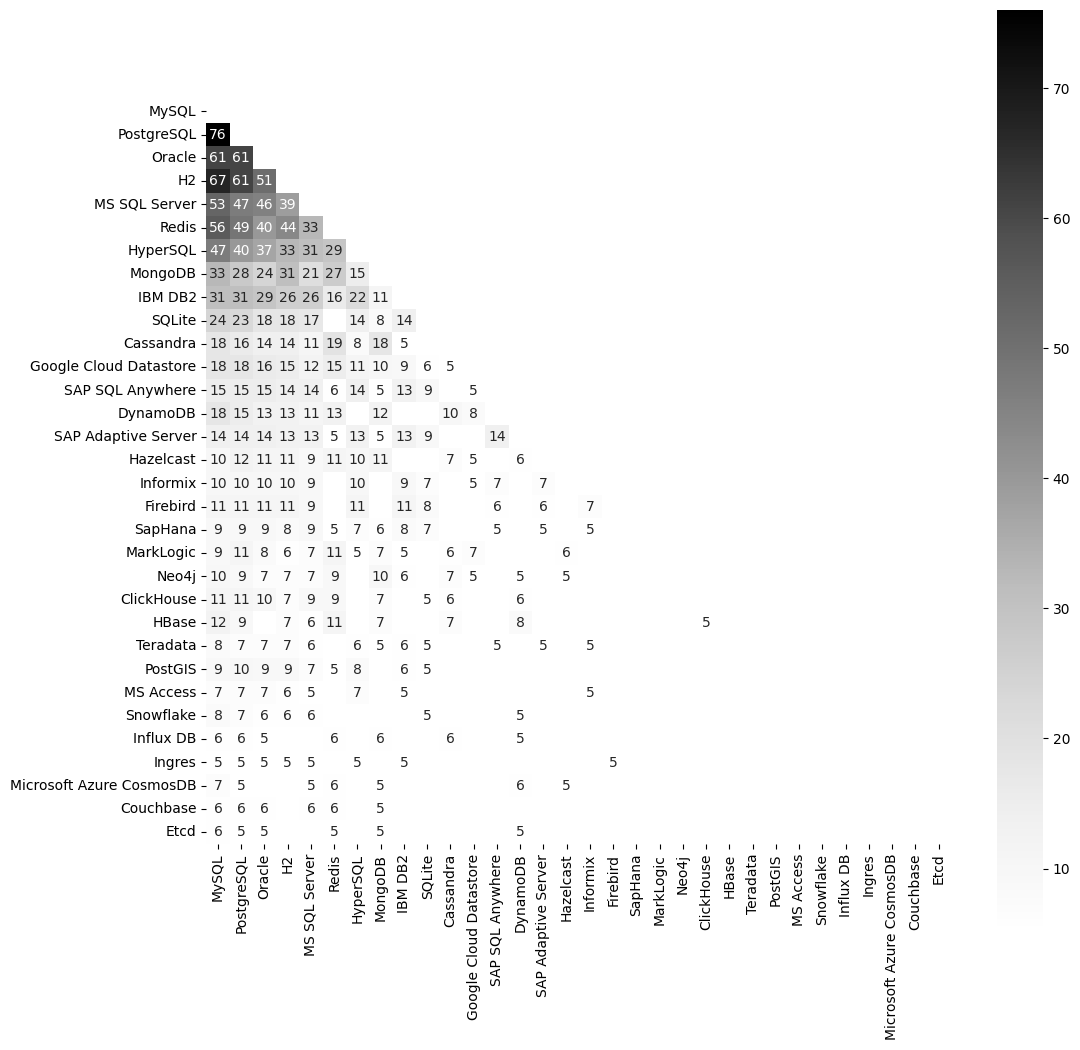

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Ordena as linhas (Antecedents) para que as maiores somas venham primeiro
ordered_rows = pivot_filled.sum(axis=1).sort_values(ascending=False).index  # Ordena as linhas

# Ordena as colunas (Consequents) para que as maiores somas venham primeiro
ordered_cols = pivot_filled.sum(axis=0).sort_values(ascending=False).index  # Ordena as colunas

# Reordena a tabela pivotada tanto pelas linhas quanto pelas colunas
pivot_ordered = pivot_filled.loc[ordered_rows, ordered_cols]

# Cria a máscara para o triângulo superior na matriz reordenada
mask_lower = np.triu(np.ones(pivot_ordered.shape), k=0)

# Configura o heatmap com a tabela reordenada
sns.heatmap(
    pivot_ordered, 
    mask=mask_lower, 
    xticklabels=True, 
    yticklabels=True, 
    annot=True, 
    cmap=sns.color_palette("Greys", as_cmap=True), 
    square=True
)

# Adiciona legendas para os eixos X e Y
#plt.xlabel("Consequents")
#plt.ylabel("Antecedents")

# Ajusta o tamanho da figura
fig = plt.gcf()
fig.set_size_inches(12, 12)

# Salva o gráfico em um arquivo PDF
plt.savefig(IMAGES_DIR + "/heat_v10.pdf", format="pdf", bbox_inches="tight")

plt.show()


In [25]:
lista = []
lista = orules1c['Antecedents'].drop_duplicates()
lista

0                       MySQL
31                 PostgreSQL
61                         H2
86                     Oracle
111                     Redis
132                  HyperSQL
149             MS SQL Server
172                   MongoDB
190                   IBM DB2
204          SAP SQL Anywhere
209                  DynamoDB
218                    SQLite
227    Google Cloud Datastore
235                 Cassandra
241       SAP Adaptive Server
245                  Firebird
247                 Hazelcast
250                     HBase
251                  Informix
Name: Antecedents, dtype: category
Categories (32, object): ['MySQL', 'PostgreSQL', 'H2', 'Oracle', ..., 'Influx DB', 'Couchbase', 'Etcd', 'Ingres']

In [26]:
pivot = orules1c.pivot(index='Antecedents', columns='Consequents', values='support_abs')

In [27]:
pivot = pivot.reset_index()

In [28]:
pivot

Consequents,Antecedents,PostgreSQL,H2,Oracle,Redis,HyperSQL,MS SQL Server,MongoDB,IBM DB2,SAP SQL Anywhere,...,Neo4j,SapHana,Teradata,Snowflake,MS Access,Microsoft Azure CosmosDB,Influx DB,Couchbase,Etcd,Ingres
0,MySQL,76.0,67.0,61.0,56.0,47.0,53.0,33.0,31.0,15.0,...,10.0,9.0,8.0,8.0,7.0,7.0,6.0,6.0,6.0,5.0
1,PostgreSQL,NaN,61.0,61.0,49.0,40.0,47.0,28.0,31.0,15.0,...,9.0,9.0,7.0,7.0,7.0,5.0,6.0,6.0,5.0,5.0
2,H2,NaN,NaN,51.0,44.0,33.0,39.0,31.0,26.0,14.0,...,7.0,8.0,7.0,6.0,6.0,NaN,NaN,NaN,NaN,5.0
3,Oracle,NaN,NaN,NaN,NaN,37.0,46.0,24.0,29.0,15.0,...,7.0,9.0,7.0,6.0,7.0,NaN,5.0,6.0,5.0,5.0
4,Redis,NaN,NaN,40.0,NaN,29.0,33.0,27.0,16.0,6.0,...,9.0,5.0,NaN,NaN,NaN,6.0,6.0,6.0,5.0,NaN
5,HyperSQL,NaN,NaN,NaN,NaN,NaN,31.0,15.0,22.0,14.0,...,NaN,7.0,6.0,NaN,7.0,NaN,NaN,NaN,NaN,5.0
6,MS SQL Server,NaN,NaN,NaN,NaN,NaN,NaN,21.0,26.0,14.0,...,7.0,9.0,6.0,6.0,5.0,5.0,NaN,6.0,NaN,5.0
7,MongoDB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,5.0,...,10.0,6.0,5.0,NaN,NaN,5.0,6.0,5.0,5.0,NaN
8,IBM DB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,...,6.0,8.0,6.0,NaN,5.0,NaN,NaN,NaN,NaN,5.0
9,SAP SQL Anywhere,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
#Test generating the graph with all the rules ordered with the sort function
import plotly.express as px 
#fig = px.scatter(rules1c.groupby(['antecedent_sup_abs','consequent_sup_abs']).mean().sort_values(['support_abs',], ascending=[False]),
#rules1c = rules1c.sort_values(['support_abs'], ascending=[False])
orules1c['support_abs'] = orules1c['support_abs'].astype(int)
fig = px.scatter(orules1c, x="Consequents", y="Antecedents", 
#x="consequents", y="antecedents", 
size='support_abs',  color="support_abs", title='Correlation of the most frequent databases in the last version',
hover_data=['support_abs'], color_continuous_scale = ["silver", "gray"], width=1000, height=1000, text= 'support_abs') 
#fig.title('Correlation of the most frequent databases')
fig.show()

In [30]:
#Test sorting only by support, after the sort function
orules1cd = orules1c.sort_values(by=['support_abs'], ascending=False)
orules1cd

,Antecedents,Consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,MySQL,PostgreSQL,0.484848,113.454545,0.402597,94.207792,0.329004,76,0.678571,1.685484,0.133806,1.858586,1.0,1.0
1,MySQL,H2,0.484848,113.454545,0.389610,91.168831,0.290043,67,0.598214,1.535417,0.101141,1.519192,1.0,1.0
2,MySQL,Oracle,0.484848,113.454545,0.341991,80.025974,0.264069,61,0.544643,1.592563,0.098255,1.445039,1.0,1.0
32,PostgreSQL,Oracle,0.402597,94.207792,0.341991,80.025974,0.264069,61,0.655914,1.917926,0.126384,1.912338,1.0,1.0
31,PostgreSQL,H2,0.402597,94.207792,0.389610,91.168831,0.264069,61,0.655914,1.683513,0.107213,1.773945,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,SAP SQL Anywhere,SapHana,0.064935,15.194805,0.038961,9.116883,0.021645,5,0.333333,8.555556,0.019115,1.441558,1.0,1.0
208,SAP SQL Anywhere,Teradata,0.064935,15.194805,0.034632,8.103896,0.021645,5,0.333333,9.625000,0.019396,1.448052,1.0,1.0
213,DynamoDB,Neo4j,0.125541,29.376623,0.047619,11.142857,0.021645,5,0.172414,3.620690,0.015667,1.150794,1.0,1.0
214,DynamoDB,Snowflake,0.125541,29.376623,0.034632,8.103896,0.021645,5,0.172414,4.978448,0.017297,1.166486,1.0,1.0


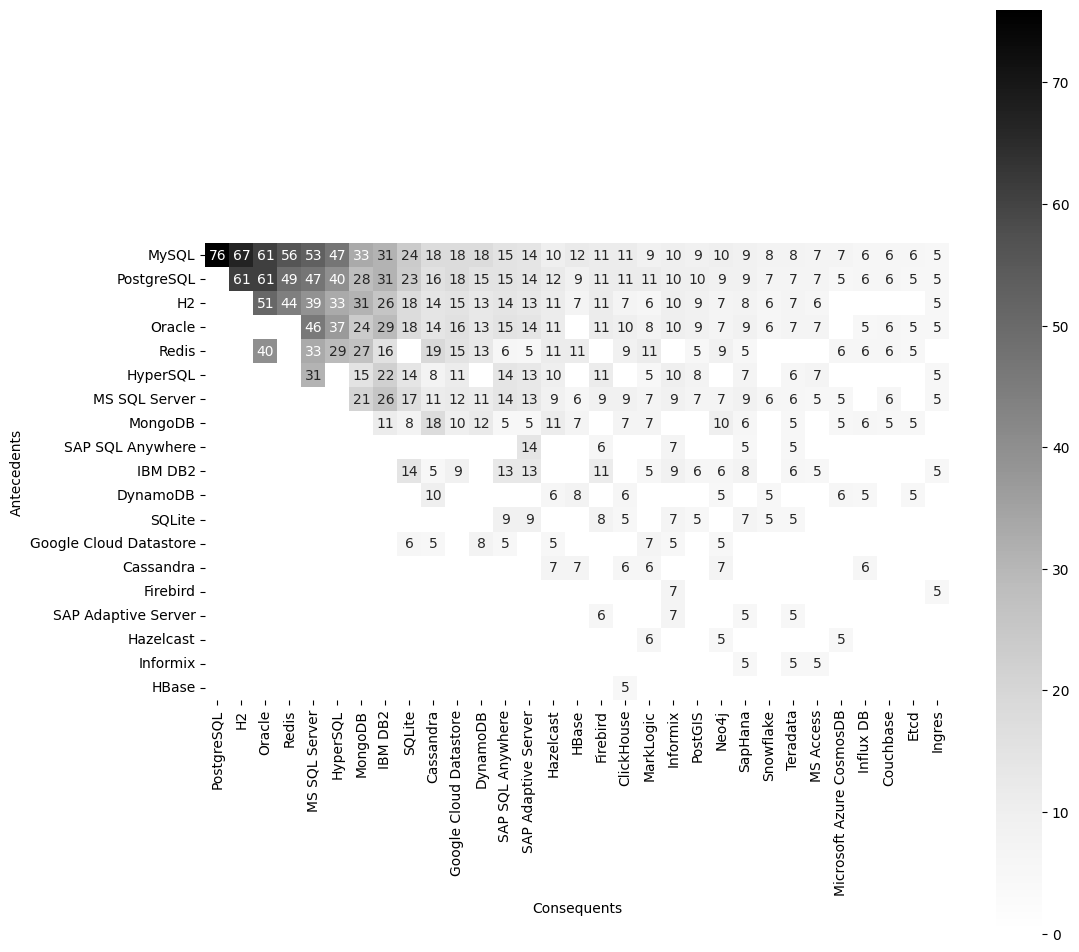

In [31]:
#Test sorting only by support, after the sort function
import seaborn as sns
pivot = orules1cd.pivot(index='Antecedents', columns='Consequents', values='support_abs')
#pivot = pivot.iloc[::-1]
sns.heatmap(pivot, xticklabels=True, yticklabels=True, vmin=0, annot=True, cmap=sns.color_palette("Greys", as_cmap=True), square=True)
fig = plt.gcf()
fig.set_size_inches(12, 12)
plt.savefig(IMAGES_DIR+"/fig14.pdf", format="pdf", bbox_inches="tight")

In [32]:
num_unicos = orules1cd['Antecedents'].nunique()
#print(num_unicos)

colunas_unicas = orules1cd['Consequents'].nunique()
#print(colunas_unicas)

intersecao = set(orules1cd['Antecedents']).intersection(orules1cd['Consequents'])
tam_intersecao = len(intersecao)
#print(tam_intersecao)

dif1 = num_unicos - tam_intersecao
dif2 = colunas_unicas - tam_intersecao
Total = dif1 + dif2 + tam_intersecao

print(Total)

32


Running the cells grouping by consequents and antecedents to identify the most used DBs together

In [33]:
rules1c = df2.groupby(['antecedents','consequents']).mean().sort_values(['support',], ascending=[False])

#sum().plot(kind='line')

#rules1c = rules1c[(rules1c['support'] >= 0.07)] 
rules1c

antecedent support  antecedent_sup_abs  \
antecedents consequents                                             
MySQL       PostgreSQL               0.484848          113.454545   
PostgreSQL  MySQL                    0.402597           94.207792   
MySQL       H2                       0.484848          113.454545   
H2          MySQL                    0.389610           91.168831   
            PostgreSQL               0.389610           91.168831   
...                                       ...                 ...   
Ingres      HyperSQL                 0.021645            5.064935   
            IBM DB2                  0.021645            5.064935   
            MS SQL Server            0.021645            5.064935   
            MySQL                    0.021645            5.064935   
Teradata    SQLite                   0.034632            8.103896   

                           consequent support  consequent_sup_abs   support  \
antecedents consequents                                                       
MySQL       PostgreSQL               0.402597           94.207792  0.329004   
PostgreSQL  MySQL                    0.484848          113.454545  0.329004   
MySQL       H2                       0.389610           91.168831  0.290043   
H2          MySQL                    0.484848          113.454545  0.290043   
            PostgreSQL               0.402597           94.207792  0.264069   
...                                       ...                 ...       ...   
Ingres      HyperSQL                 0.242424           56.727273  0.021645   
            IBM DB2                  0.134199           31.402597  0.021645   
            MS SQL Server            0.238095           55.714286  0.021645   
            MySQL                    0.484848          113.454545  0.021645   
Teradata    SQLite                   0.125541           29.376623  0.021645   

                           support_abs  confidence      lift  leverage  \
antecedents consequents                                                  
MySQL       PostgreSQL       76.987013    0.678571  1.685484  0.133806   
PostgreSQL  MySQL            76.987013    0.817204  1.685484  0.133806   
MySQL       H2               67.870130    0.598214  1.535417  0.101141   
H2          MySQL            67.870130    0.744444  1.535417  0.101141   
            PostgreSQL       61.792208    0.677778  1.683513  0.107213   
...                                ...         ...       ...       ...   
Ingres      HyperSQL          5.064935    1.000000  4.125000  0.016398   
            IBM DB2           5.064935    1.000000  7.451613  0.018740   
            MS SQL Server     5.064935    1.000000  4.200000  0.016491   
            MySQL             5.064935    1.000000  2.062500  0.011150   
Teradata    SQLite            5.064935    0.625000  4.978448  0.017297   

                           conviction  antecedent_len  consequente_len  
antecedents consequents                                                 
MySQL       PostgreSQL       1.858586             1.0              1.0  
PostgreSQL  MySQL            2.818182             1.0              1.0  
MySQL       H2               1.519192             1.0              1.0  
H2          MySQL            2.015810             1.0              1.0  
            PostgreSQL       1.854008             1.0              1.0  
...                               ...             ...              ...  
Ingres      HyperSQL              inf             1.0              1.0  
            IBM DB2               inf             1.0              1.0  
            MS SQL Server         inf             1.0              1.0  
            MySQL                 inf             1.0              1.0  
Teradata    SQLite           2.331890             1.0              1.0  

[508 rows x 12 columns]

In [34]:
#rules1ca = rules1c.groupby(['consequents']).mean().sort_values(['consequent_sup_abs','support_abs'], ascending=[False,False])
rules1ca = rules1c.groupby(['consequents']).mean().sort_values(['support'], ascending=[False])
rules1ca

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
consequents,,,,,,,,,,,,
MySQL,0.115487,27.023879,0.484848,113.454545,0.094261,22.056975,0.879563,1.814098,0.038267,NaN,1.0,1.0
PostgreSQL,0.118140,27.644742,0.402597,94.207792,0.088535,20.717218,0.832592,2.068051,0.040972,NaN,1.0,1.0
H2,0.131954,30.877345,0.389610,91.168831,0.086420,20.222222,0.723172,1.856141,0.035009,NaN,1.0,1.0
Oracle,0.125093,29.271832,0.341991,80.025974,0.082848,19.386476,0.773180,2.260817,0.040067,NaN,1.0,1.0
Redis,0.140693,32.922078,0.350649,82.051948,0.078644,18.402597,0.642227,1.831537,0.029310,NaN,1.0,1.0
HyperSQL,0.154073,36.053129,0.242424,56.727273,0.075364,17.635183,0.639663,2.638611,0.038013,NaN,1.0,1.0
MS SQL Server,0.130019,30.424541,0.238095,55.714286,0.071503,16.731751,0.666335,2.798609,0.040546,NaN,1.0,1.0
IBM DB2,0.157812,36.927981,0.134199,31.402597,0.060409,14.135773,0.554800,4.134152,0.039231,NaN,1.0,1.0
MongoDB,0.146320,34.238961,0.186147,43.558442,0.055758,13.047273,0.516382,2.774050,0.028520,NaN,1.0,1.0


In [35]:
#rules1ca = rules1c.groupby('antecedents').mean().sort_values(['antecedent_sup_abs','support_abs'], ascending=[False,False])
rules1ca = rules1c.groupby('antecedents').mean().sort_values('support', ascending=False)
rules1ca

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
antecedents,,,,,,,,,,,,
MySQL,0.484848,113.454545,0.115487,27.023879,0.094261,22.056975,0.194412,1.814098,0.038267,1.138424,1.0,1.0
PostgreSQL,0.402597,94.207792,0.118140,27.644742,0.088535,20.717218,0.219910,2.068051,0.040972,1.216320,1.0,1.0
H2,0.389610,91.168831,0.131954,30.877345,0.086420,20.222222,0.221811,1.856141,0.035009,1.173338,1.0,1.0
Oracle,0.341991,80.025974,0.125093,29.271832,0.082848,19.386476,0.242252,2.260817,0.040067,1.253321,1.0,1.0
Redis,0.350649,82.051948,0.140693,32.922078,0.078644,18.402597,0.224280,1.831537,0.029310,1.146169,1.0,1.0
HyperSQL,0.242424,56.727273,0.154073,36.053129,0.075364,17.635183,0.310877,2.638611,0.038013,1.367468,1.0,1.0
MS SQL Server,0.238095,55.714286,0.130019,30.424541,0.071503,16.731751,0.300313,2.798609,0.040546,1.871372,1.0,1.0
IBM DB2,0.134199,31.402597,0.157812,36.927981,0.060409,14.135773,0.450147,4.134152,0.039231,NaN,1.0,1.0
MongoDB,0.186147,43.558442,0.146320,34.238961,0.055758,13.047273,0.299535,2.774050,0.028520,1.310974,1.0,1.0


In [36]:
# To filter only the 10 most used in the current version
rules1cb = rules1ca[(rules1ca['support'] >= 0.05)] 
rules1cb

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
antecedents,,,,,,,,,,,,
MySQL,0.484848,113.454545,0.115487,27.023879,0.094261,22.056975,0.194412,1.814098,0.038267,1.138424,1.0,1.0
PostgreSQL,0.402597,94.207792,0.118140,27.644742,0.088535,20.717218,0.219910,2.068051,0.040972,1.216320,1.0,1.0
H2,0.389610,91.168831,0.131954,30.877345,0.086420,20.222222,0.221811,1.856141,0.035009,1.173338,1.0,1.0
Oracle,0.341991,80.025974,0.125093,29.271832,0.082848,19.386476,0.242252,2.260817,0.040067,1.253321,1.0,1.0
Redis,0.350649,82.051948,0.140693,32.922078,0.078644,18.402597,0.224280,1.831537,0.029310,1.146169,1.0,1.0
HyperSQL,0.242424,56.727273,0.154073,36.053129,0.075364,17.635183,0.310877,2.638611,0.038013,1.367468,1.0,1.0
MS SQL Server,0.238095,55.714286,0.130019,30.424541,0.071503,16.731751,0.300313,2.798609,0.040546,1.871372,1.0,1.0
IBM DB2,0.134199,31.402597,0.157812,36.927981,0.060409,14.135773,0.450147,4.134152,0.039231,NaN,1.0,1.0
MongoDB,0.186147,43.558442,0.146320,34.238961,0.055758,13.047273,0.299535,2.774050,0.028520,1.310974,1.0,1.0


Identifying the antecedents and consequences that lead to the use of the 10 most used DBs

In [37]:
rules2 = df[ (df['consequents'].str.contains('MySQL')) &(df['confidence'] > 0.7)]
rules2

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
310,Snowflake,MySQL,0.034632,8.103896,0.484848,113.454545,0.034632,8.103896,1.000000,2.062500,0.017841,inf,1,1
313,IBM DB2,MySQL,0.134199,31.402597,0.484848,113.454545,0.134199,31.402597,1.000000,2.062500,0.069133,inf,1,1
315,MS Access,MySQL,0.030303,7.090909,0.484848,113.454545,0.030303,7.090909,1.000000,2.062500,0.015611,inf,1,1
317,Microsoft Azure CosmosDB,MySQL,0.030303,7.090909,0.484848,113.454545,0.030303,7.090909,1.000000,2.062500,0.015611,inf,1,1
319,Ingres,MySQL,0.021645,5.064935,0.484848,113.454545,0.021645,5.064935,1.000000,2.062500,0.011150,inf,1,1
320,SAP Adaptive Server,MySQL,0.060606,14.181818,0.484848,113.454545,0.060606,14.181818,1.000000,2.062500,0.031221,inf,1,1
322,Couchbase,MySQL,0.025974,6.077922,0.484848,113.454545,0.025974,6.077922,1.000000,2.062500,0.013381,inf,1,1
324,Firebird,MySQL,0.047619,11.142857,0.484848,113.454545,0.047619,11.142857,1.000000,2.062500,0.024531,inf,1,1
326,ClickHouse,MySQL,0.047619,11.142857,0.484848,113.454545,0.047619,11.142857,1.000000,2.062500,0.024531,inf,1,1
328,Influx DB,MySQL,0.025974,6.077922,0.484848,113.454545,0.025974,6.077922,1.000000,2.062500,0.013381,inf,1,1


In [38]:
rules3 = df[(df['consequents'].str.contains('PostgreSQL')) | (df['antecedents'].str.contains('PostgreSQL'))] #(df['confidence'] > 0.7) ]
pd.set_option('display.max_rows', None)     # Exibe todas as linhas
pd.set_option('display.max_columns', None) 
rules3

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
226,PostgreSQL,Ingres,0.402597,94.207792,0.021645,5.064935,0.021645,5.064935,0.053763,2.483871,0.012931,1.033943,1,1
227,Ingres,PostgreSQL,0.021645,5.064935,0.402597,94.207792,0.021645,5.064935,1.000000,2.483871,0.012931,inf,1,1
228,PostgreSQL,SAP Adaptive Server,0.402597,94.207792,0.060606,14.181818,0.060606,14.181818,0.150538,2.483871,0.036206,1.105869,1,1
229,PostgreSQL,ClickHouse,0.402597,94.207792,0.047619,11.142857,0.047619,11.142857,0.118280,2.483871,0.028448,1.080139,1,1
230,PostgreSQL,Firebird,0.402597,94.207792,0.047619,11.142857,0.047619,11.142857,0.118280,2.483871,0.028448,1.080139,1,1
231,ClickHouse,PostgreSQL,0.047619,11.142857,0.402597,94.207792,0.047619,11.142857,1.000000,2.483871,0.028448,inf,1,1
232,SAP Adaptive Server,PostgreSQL,0.060606,14.181818,0.402597,94.207792,0.060606,14.181818,1.000000,2.483871,0.036206,inf,1,1
233,Couchbase,PostgreSQL,0.025974,6.077922,0.402597,94.207792,0.025974,6.077922,1.000000,2.483871,0.015517,inf,1,1
234,Firebird,PostgreSQL,0.047619,11.142857,0.402597,94.207792,0.047619,11.142857,1.000000,2.483871,0.028448,inf,1,1
235,PostgreSQL,PostGIS,0.402597,94.207792,0.043290,10.129870,0.043290,10.129870,0.107527,2.483871,0.025862,1.071976,1,1


In [39]:
rules4 = df[(df['consequents'].str.contains('H2')) & (df['confidence'] > 0.7) ]
rules4

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
217,Informix,H2,0.043290,10.129870,0.38961,91.168831,0.043290,10.129870,1.000000,2.566667,0.026424,inf,1,1
218,Firebird,H2,0.047619,11.142857,0.38961,91.168831,0.047619,11.142857,1.000000,2.566667,0.029066,inf,1,1
221,Ingres,H2,0.021645,5.064935,0.38961,91.168831,0.021645,5.064935,1.000000,2.566667,0.013212,inf,1,1
264,SAP SQL Anywhere,H2,0.064935,15.194805,0.38961,91.168831,0.060606,14.181818,0.933333,2.395556,0.035307,9.155844,1,1
266,SAP Adaptive Server,H2,0.060606,14.181818,0.38961,91.168831,0.056277,13.168831,0.928571,2.383333,0.032664,8.545455,1,1
275,PostGIS,H2,0.043290,10.129870,0.38961,91.168831,0.038961,9.116883,0.900000,2.310000,0.022095,6.103896,1,1
276,SapHana,H2,0.038961,9.116883,0.38961,91.168831,0.034632,8.103896,0.888889,2.281481,0.019452,5.493506,1,1
283,Teradata,H2,0.034632,8.103896,0.38961,91.168831,0.030303,7.090909,0.875000,2.245833,0.016810,4.883117,1,1
290,MS Access,H2,0.030303,7.090909,0.38961,91.168831,0.025974,6.077922,0.857143,2.200000,0.014168,4.272727,1,1
298,IBM DB2,H2,0.134199,31.402597,0.38961,91.168831,0.112554,26.337662,0.838710,2.152688,0.060269,3.784416,1,1


In [40]:
rules5 = df[(df['consequents'].str.contains('Oracle')) & (df['confidence'] > 0.7) ]
rules5

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
187,Ingres,Oracle,0.021645,5.064935,0.341991,80.025974,0.021645,5.064935,1.000000,2.924051,0.014243,inf,1,1
189,MS Access,Oracle,0.030303,7.090909,0.341991,80.025974,0.030303,7.090909,1.000000,2.924051,0.019940,inf,1,1
190,Couchbase,Oracle,0.025974,6.077922,0.341991,80.025974,0.025974,6.077922,1.000000,2.924051,0.017091,inf,1,1
191,Firebird,Oracle,0.047619,11.142857,0.341991,80.025974,0.047619,11.142857,1.000000,2.924051,0.031334,inf,1,1
192,SAP Adaptive Server,Oracle,0.060606,14.181818,0.341991,80.025974,0.060606,14.181818,1.000000,2.924051,0.039879,inf,1,1
194,SAP SQL Anywhere,Oracle,0.064935,15.194805,0.341991,80.025974,0.064935,15.194805,1.000000,2.924051,0.042728,inf,1,1
195,SapHana,Oracle,0.038961,9.116883,0.341991,80.025974,0.038961,9.116883,1.000000,2.924051,0.025637,inf,1,1
197,Informix,Oracle,0.043290,10.129870,0.341991,80.025974,0.043290,10.129870,1.000000,2.924051,0.028485,inf,1,1
205,IBM DB2,Oracle,0.134199,31.402597,0.341991,80.025974,0.125541,29.376623,0.935484,2.735402,0.079646,10.199134,1,1
208,ClickHouse,Oracle,0.047619,11.142857,0.341991,80.025974,0.043290,10.129870,0.909091,2.658228,0.027005,7.238095,1,1


In [41]:
rules6 = df[(df['consequents'].str.contains('Ehcache'))]# & (df['confidence'] > 0.7) ]
rules6


,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


In [42]:
rules7 = df[ (df['consequents'].str.contains('Redis')) ] #& (df['confidence'] > 0.7)]
rules7

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
200,Influx DB,Redis,0.025974,6.077922,0.350649,82.051948,0.025974,6.077922,1.000000,2.851852,0.016866,inf,1,1
201,Couchbase,Redis,0.025974,6.077922,0.350649,82.051948,0.025974,6.077922,1.000000,2.851852,0.016866,inf,1,1
213,MarkLogic,Redis,0.051948,12.155844,0.350649,82.051948,0.047619,11.142857,0.916667,2.614198,0.029403,7.792208,1,1
251,Cassandra,Redis,0.095238,22.285714,0.350649,82.051948,0.082251,19.246753,0.863636,2.462963,0.048856,4.761905,1,1
259,Microsoft Azure CosmosDB,Redis,0.030303,7.090909,0.350649,82.051948,0.025974,6.077922,0.857143,2.444444,0.015348,4.545455,1,1
268,ClickHouse,Redis,0.047619,11.142857,0.350649,82.051948,0.038961,9.116883,0.818182,2.333333,0.022263,3.571429,1,1
271,Neo4j,Redis,0.047619,11.142857,0.350649,82.051948,0.038961,9.116883,0.818182,2.333333,0.022263,3.571429,1,1
306,HBase,Redis,0.064935,15.194805,0.350649,82.051948,0.047619,11.142857,0.733333,2.091358,0.024850,2.435065,1,1
340,Etcd,Redis,0.030303,7.090909,0.350649,82.051948,0.021645,5.064935,0.714286,2.037037,0.011019,2.272727,1,1
375,Hazelcast,Redis,0.073593,17.220779,0.350649,82.051948,0.047619,11.142857,0.647059,1.845316,0.021814,1.839827,1,1


In [43]:
rules8 = df[ (df['consequents'].str.contains('SQLite')) & (df['confidence'] > 0.7) ]
rules8

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
55,SapHana,SQLite,0.038961,9.116883,0.125541,29.376623,0.030303,7.090909,0.777778,6.195402,0.025412,3.935065,1,1
58,Firebird,SQLite,0.047619,11.142857,0.125541,29.376623,0.034632,8.103896,0.727273,5.793103,0.028654,3.206349,1,1
67,Informix,SQLite,0.043290,10.129870,0.125541,29.376623,0.030303,7.090909,0.700000,5.575862,0.024868,2.914863,1,1


In [44]:
rules9 = df[(df['consequents'].str.contains('MongoDB')) & (df['confidence'] > 0.7) ]
rules9

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
68,Influx DB,MongoDB,0.025974,6.077922,0.186147,43.558442,0.025974,6.077922,1.000000,5.372093,0.021139,inf,1,1
84,Neo4j,MongoDB,0.047619,11.142857,0.186147,43.558442,0.043290,10.129870,0.909091,4.883721,0.034426,8.952381,1,1
90,Couchbase,MongoDB,0.025974,6.077922,0.186147,43.558442,0.021645,5.064935,0.833333,4.476744,0.016810,4.883117,1,1
94,Cassandra,MongoDB,0.095238,22.285714,0.186147,43.558442,0.077922,18.233766,0.818182,4.395349,0.060194,4.476190,1,1
128,Etcd,MongoDB,0.030303,7.090909,0.186147,43.558442,0.021645,5.064935,0.714286,3.837209,0.016004,2.848485,1,1
130,Microsoft Azure CosmosDB,MongoDB,0.030303,7.090909,0.186147,43.558442,0.021645,5.064935,0.714286,3.837209,0.016004,2.848485,1,1


In [45]:
rules10 = df[ (df['consequents'].str.contains('MS SQL Server')) & (df['confidence'] > 0.7) ]
rules10

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
103,SapHana,MS SQL Server,0.038961,9.116883,0.238095,55.714286,0.038961,9.116883,1.000000,4.200000,0.029685,inf,1,1
104,Couchbase,MS SQL Server,0.025974,6.077922,0.238095,55.714286,0.025974,6.077922,1.000000,4.200000,0.019790,inf,1,1
107,Ingres,MS SQL Server,0.021645,5.064935,0.238095,55.714286,0.021645,5.064935,1.000000,4.200000,0.016491,inf,1,1
120,SAP SQL Anywhere,MS SQL Server,0.064935,15.194805,0.238095,55.714286,0.060606,14.181818,0.933333,3.920000,0.045145,11.428571,1,1
123,SAP Adaptive Server,MS SQL Server,0.060606,14.181818,0.238095,55.714286,0.056277,13.168831,0.928571,3.900000,0.041847,10.666667,1,1
134,Informix,MS SQL Server,0.043290,10.129870,0.238095,55.714286,0.038961,9.116883,0.900000,3.780000,0.028654,7.619048,1,1
147,IBM DB2,MS SQL Server,0.134199,31.402597,0.238095,55.714286,0.112554,26.337662,0.838710,3.522581,0.080602,4.723810,1,1
152,ClickHouse,MS SQL Server,0.047619,11.142857,0.238095,55.714286,0.038961,9.116883,0.818182,3.436364,0.027623,4.190476,1,1
153,Firebird,MS SQL Server,0.047619,11.142857,0.238095,55.714286,0.038961,9.116883,0.818182,3.436364,0.027623,4.190476,1,1
164,Snowflake,MS SQL Server,0.034632,8.103896,0.238095,55.714286,0.025974,6.077922,0.750000,3.150000,0.017728,3.047619,1,1


In [46]:
rules11 = df[ (df['consequents'] .str.contains('MySQL')) & (df['antecedents'] .str.contains('MariaDB'))|
             (df['antecedents'] .str.contains('MySQL')) & (df['consequents'] .str.contains('MariaDB'))] #& (df['confidence'] > 0.7) ]
rules11

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


Expected Patterns Session
In the rules below, we highlight the dependence presented in opposite directions and the expected correlation.

In [47]:
rules9 = df[((df['antecedents'].str.contains('MariaDB')) & (df['consequents'].str.contains('MySQL'))) | 
((df['antecedents'].str.contains('MySQL')) & (df['consequents'].str.contains('MariaDB')))]
rules9

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


In [48]:
rules10 = df2[((df2['antecedents'].str.contains('PostgreSQL')) & (df2['consequents'].str.contains('PostGIS'))) | 
((df2['antecedents'].str.contains('PostGIS')) & (df2['consequents'].str.contains('PostgreSQL')))]
rules10

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
235,PostgreSQL,PostGIS,0.402597,94.207792,0.043290,10.129870,0.04329,10.12987,0.107527,2.483871,0.025862,1.071976,1,1
236,PostGIS,PostgreSQL,0.043290,10.129870,0.402597,94.207792,0.04329,10.12987,1.000000,2.483871,0.025862,inf,1,1


In [49]:
rules11a = df[ (df['consequents'] .str.contains('MySQL')) & (df['antecedents'] .str.contains('MariaDB'))|
             (df['antecedents'] .str.contains('MySQL')) & (df['consequents'] .str.contains('MariaDB'))] #& (df['confidence'] > 0.7) ]
rules11a

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


In [50]:
rules12a = df[ (df['consequents'] .str.contains('PostgreSQL')) & (df['antecedents'] .str.contains('PostGIS'))|
             (df['antecedents'] .str.contains('PostgreSQL')) & (df['consequents'] .str.contains('PostGIS'))] #& (df['confidence'] > 0.7) ]
rules12a

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
235,PostgreSQL,PostGIS,0.402597,94.207792,0.043290,10.129870,0.04329,10.12987,0.107527,2.483871,0.025862,1.071976,1,1
236,PostGIS,PostgreSQL,0.043290,10.129870,0.402597,94.207792,0.04329,10.12987,1.000000,2.483871,0.025862,inf,1,1


Unexpected Patterns Session
In the rules below we highlight competition and high lift values.

In [51]:
rulesTeste = df[ (df['consequents'] .str.contains('Cassandra')) & (df['confidence'] > 0.5) ]
rulesTeste

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
17,Influx DB,Cassandra,0.025974,6.077922,0.095238,22.285714,0.025974,6.077922,1.000000,10.500000,0.023500,inf,1,1
47,Neo4j,Cassandra,0.047619,11.142857,0.095238,22.285714,0.030303,7.090909,0.636364,6.681818,0.025768,2.488095,1,1
61,ClickHouse,Cassandra,0.047619,11.142857,0.095238,22.285714,0.025974,6.077922,0.545455,5.727273,0.021439,1.990476,1,1


In [52]:
rules3 = df[(df['consequents'].str.contains('PostgreSQL') | (df['antecedents'].str.contains('PostgreSQL'))) & (df['confidence'] > 0.7) ]
rules3

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
227,Ingres,PostgreSQL,0.021645,5.064935,0.402597,94.207792,0.021645,5.064935,1.000000,2.483871,0.012931,inf,1,1
231,ClickHouse,PostgreSQL,0.047619,11.142857,0.402597,94.207792,0.047619,11.142857,1.000000,2.483871,0.028448,inf,1,1
232,SAP Adaptive Server,PostgreSQL,0.060606,14.181818,0.402597,94.207792,0.060606,14.181818,1.000000,2.483871,0.036206,inf,1,1
233,Couchbase,PostgreSQL,0.025974,6.077922,0.402597,94.207792,0.025974,6.077922,1.000000,2.483871,0.015517,inf,1,1
234,Firebird,PostgreSQL,0.047619,11.142857,0.402597,94.207792,0.047619,11.142857,1.000000,2.483871,0.028448,inf,1,1
236,PostGIS,PostgreSQL,0.043290,10.129870,0.402597,94.207792,0.043290,10.129870,1.000000,2.483871,0.025862,inf,1,1
238,MS Access,PostgreSQL,0.030303,7.090909,0.402597,94.207792,0.030303,7.090909,1.000000,2.483871,0.018103,inf,1,1
239,IBM DB2,PostgreSQL,0.134199,31.402597,0.402597,94.207792,0.134199,31.402597,1.000000,2.483871,0.080171,inf,1,1
240,Informix,PostgreSQL,0.043290,10.129870,0.402597,94.207792,0.043290,10.129870,1.000000,2.483871,0.025862,inf,1,1
242,SapHana,PostgreSQL,0.038961,9.116883,0.402597,94.207792,0.038961,9.116883,1.000000,2.483871,0.023275,inf,1,1


In [53]:
rules12 = df2[(df2['lift'] > 9)] #>20
rules12

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,Ingres,Firebird,0.021645,5.064935,0.047619,11.142857,0.021645,5.064935,1.000000,21.000000,0.020614,inf,1,1
1,Firebird,Ingres,0.047619,11.142857,0.021645,5.064935,0.021645,5.064935,0.454545,21.000000,0.020614,1.793651,1,1
2,Informix,MS Access,0.043290,10.129870,0.030303,7.090909,0.021645,5.064935,0.500000,16.500000,0.020333,1.939394,1,1
3,MS Access,Informix,0.030303,7.090909,0.043290,10.129870,0.021645,5.064935,0.714286,16.500000,0.020333,3.348485,1,1
4,SAP Adaptive Server,SAP SQL Anywhere,0.060606,14.181818,0.064935,15.194805,0.060606,14.181818,1.000000,15.400000,0.056671,inf,1,1
5,SAP SQL Anywhere,SAP Adaptive Server,0.064935,15.194805,0.060606,14.181818,0.060606,14.181818,0.933333,15.400000,0.056671,14.090909,1,1
6,Informix,Firebird,0.043290,10.129870,0.047619,11.142857,0.030303,7.090909,0.700000,14.700000,0.028242,3.174603,1,1
7,Firebird,Informix,0.047619,11.142857,0.043290,10.129870,0.030303,7.090909,0.636364,14.700000,0.028242,2.630952,1,1
8,Informix,Teradata,0.043290,10.129870,0.034632,8.103896,0.021645,5.064935,0.500000,14.437500,0.020146,1.930736,1,1
9,Teradata,Informix,0.034632,8.103896,0.043290,10.129870,0.021645,5.064935,0.625000,14.437500,0.020146,2.551227,1,1


In [54]:
#if you need to generate the rules in excel
#rules_filter = df2.to_excel('historical_filters.xlsx', index=False)

In [55]:
rules14 = df2[(df2['confidence'] > 0.9)] #>20(['support_abs'], ascending=[False])
rules14 = rules14.sort_values(['lift'], ascending=False)
rules14

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,Ingres,Firebird,0.021645,5.064935,0.047619,11.142857,0.021645,5.064935,1.000000,21.000000,0.020614,inf,1,1
5,SAP SQL Anywhere,SAP Adaptive Server,0.064935,15.194805,0.060606,14.181818,0.060606,14.181818,0.933333,15.400000,0.056671,14.090909,1,1
4,SAP Adaptive Server,SAP SQL Anywhere,0.060606,14.181818,0.064935,15.194805,0.060606,14.181818,1.000000,15.400000,0.056671,inf,1,1
17,Influx DB,Cassandra,0.025974,6.077922,0.095238,22.285714,0.025974,6.077922,1.000000,10.500000,0.023500,inf,1,1
33,Firebird,IBM DB2,0.047619,11.142857,0.134199,31.402597,0.047619,11.142857,1.000000,7.451613,0.041229,inf,1,1
35,Ingres,IBM DB2,0.021645,5.064935,0.134199,31.402597,0.021645,5.064935,1.000000,7.451613,0.018740,inf,1,1
39,SAP Adaptive Server,IBM DB2,0.060606,14.181818,0.134199,31.402597,0.056277,13.168831,0.928571,6.919355,0.048144,12.121212,1,1
68,Influx DB,MongoDB,0.025974,6.077922,0.186147,43.558442,0.025974,6.077922,1.000000,5.372093,0.021139,inf,1,1
84,Neo4j,MongoDB,0.047619,11.142857,0.186147,43.558442,0.043290,10.129870,0.909091,4.883721,0.034426,8.952381,1,1
103,SapHana,MS SQL Server,0.038961,9.116883,0.238095,55.714286,0.038961,9.116883,1.000000,4.200000,0.029685,inf,1,1


In [59]:
#Top 10 rules with highest lifts in the End of the project life cycle
rules15 = df2[(df2['lift'] > 4)] #& (df2['confidence'] > 0.5)] #>20(['support_abs'], ascending=[False])
rules15 = rules15.sort_values(['lift'], ascending=False)
rules15 = rules15.rename(columns={'antecedents': 'Antecedents'})
rules15 = rules15.rename(columns={'consequents': 'Consequents'})
rules15 = rules15.rename(columns={'lift': 'Lift'})
display(rules15)

,Antecedents,Consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,Lift,leverage,conviction,antecedent_len,consequente_len
0,Ingres,Firebird,0.021645,5.064935,0.047619,11.142857,0.021645,5.064935,1.000000,21.000000,0.020614,inf,1,1
1,Firebird,Ingres,0.047619,11.142857,0.021645,5.064935,0.021645,5.064935,0.454545,21.000000,0.020614,1.793651,1,1
2,Informix,MS Access,0.043290,10.129870,0.030303,7.090909,0.021645,5.064935,0.500000,16.500000,0.020333,1.939394,1,1
3,MS Access,Informix,0.030303,7.090909,0.043290,10.129870,0.021645,5.064935,0.714286,16.500000,0.020333,3.348485,1,1
4,SAP Adaptive Server,SAP SQL Anywhere,0.060606,14.181818,0.064935,15.194805,0.060606,14.181818,1.000000,15.400000,0.056671,inf,1,1
5,SAP SQL Anywhere,SAP Adaptive Server,0.064935,15.194805,0.060606,14.181818,0.060606,14.181818,0.933333,15.400000,0.056671,14.090909,1,1
6,Informix,Firebird,0.043290,10.129870,0.047619,11.142857,0.030303,7.090909,0.700000,14.700000,0.028242,3.174603,1,1
7,Firebird,Informix,0.047619,11.142857,0.043290,10.129870,0.030303,7.090909,0.636364,14.700000,0.028242,2.630952,1,1
8,Informix,Teradata,0.043290,10.129870,0.034632,8.103896,0.021645,5.064935,0.500000,14.437500,0.020146,1.930736,1,1
9,Teradata,Informix,0.034632,8.103896,0.043290,10.129870,0.021645,5.064935,0.625000,14.437500,0.020146,2.551227,1,1


In [57]:
#rules15_filter = rules15.to_excel('rules_filters_liftv10.xlsx', index=False)

In [60]:
#Comparando as regras V10 com as regras V1 para encontrar Lifts que aumentaram com o tempo

rulesExample = rules15 = rules15.sort_values(['Lift'], ascending=False)
rulesExample = rulesExample.rename(columns={'Lift': 'Lift_rule'})

dfV1 = pd.read_excel('rules_filtersv1_order.xlsx', keep_default_na=False)
dfV1 = dfV1.rename(columns={'lift': 'lift_dfV1'})

# Faz um merge entre rulesExample e dfV1 com base nas colunas 'Antecedents' e 'Consequents'
merged_df = pd.merge(rulesExample, dfV1, on=['Antecedents', 'Consequents'], suffixes=('_rule', '_dfV1'))
# Filtra as linhas onde o Lift de dfV1 é menor que o Lift de rulesExample
result = merged_df[merged_df['lift_dfV1'] < merged_df['Lift_rule']]

# Exibe os resultados
result


,Antecedents,Consequents,antecedent support_rule,antecedent_sup_abs_rule,consequent support_rule,consequent_sup_abs_rule,support_rule,support_abs_rule,confidence_rule,Lift_rule,leverage_rule,conviction_rule,antecedent_len_rule,consequente_len_rule,antecedent support_dfV1,antecedent_sup_abs_dfV1,consequent support_dfV1,consequent_sup_abs_dfV1,support_dfV1,support_abs_dfV1,confidence_dfV1,lift_dfV1,leverage_dfV1,conviction_dfV1,antecedent_len_dfV1,consequente_len_dfV1


In [61]:
#Comparando as regras V10 com as regras V5 para encontrar Lifts que aumentaram com o tempo

rulesExample = rules15 = rules15.sort_values(['Lift'], ascending=False)
rulesExample = rulesExample.rename(columns={'Lift': 'Lift_rule'})

dfV5 = pd.read_excel('rules_filtersv5_order.xlsx', keep_default_na=False)
dfV5 = dfV5.rename(columns={'antecedents': 'Antecedents'})
dfV5 = dfV5.rename(columns={'consequents': 'Consequents'})
dfV5 = dfV5.rename(columns={'lift': 'lift_dfV5'})

# Faz um merge entre rulesExample e dfV5 com base nas colunas 'Antecedents' e 'Consequents'
merged_df = pd.merge(rulesExample, dfV5, on=['Antecedents', 'Consequents'], suffixes=('_rule', '_dfV5'))
# Filtra as linhas onde o Lift de dfV5 é menor que o Lift de rulesExample
result = merged_df[merged_df['lift_dfV5'] < merged_df['Lift_rule']]

# Calcula a diferença entre os Lifts
result['Lift_diff'] = result['Lift_rule'] - result['lift_dfV5']

# Ordena pela diferença de Lift, do maior para o menor
result_sorted = result.sort_values(by='Lift_diff', ascending=False)

# Exibe os resultados ordenados
result_sorted


/var/folders/kc/q64njxfx5xj09h4nrxwncwbw0000gn/T/ipykernel_896/2295853919.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Antecedents,Consequents,antecedent support_rule,antecedent_sup_abs_rule,consequent support_rule,consequent_sup_abs_rule,support_rule,support_abs_rule,confidence_rule,Lift_rule,leverage_rule,conviction_rule,antecedent_len_rule,consequente_len_rule,antecedent support_dfV5,antecedent_sup_abs_dfV5,consequent support_dfV5,consequent_sup_abs_dfV5,support_dfV5,support_abs_dfV5,confidence_dfV5,lift_dfV5,leverage_dfV5,conviction_dfV5,antecedent_len_dfV5,consequente_len_dfV5,Lift_diff
0,SAP Adaptive Server,SAP SQL Anywhere,0.060606,14.181818,0.064935,15.194805,0.060606,14.181818,1.000000,15.4000,0.056671,inf,1,1,0.073913,17.295652,0.073913,17.295652,0.073913,17,1.000000,13.529412,0.068450,inf,1,1,1.870588
6,Teradata,SAP Adaptive Server,0.034632,8.103896,0.060606,14.181818,0.021645,5.064935,0.625000,10.3125,0.019546,2.505051,1,1,0.034783,8.139130,0.073913,17.295652,0.021739,5,0.625000,8.455882,0.019168,2.469565,1,1,1.856618
7,Teradata,SAP SQL Anywhere,0.034632,8.103896,0.064935,15.194805,0.021645,5.064935,0.625000,9.6250,0.019396,2.493506,1,1,0.034783,8.139130,0.073913,17.295652,0.021739,5,0.625000,8.455882,0.019168,2.469565,1,1,1.169118
35,MS Access,HyperSQL,0.030303,7.090909,0.242424,56.727273,0.030303,7.090909,1.000000,4.1250,0.022957,inf,1,1,0.039130,9.156522,0.273913,64.095652,0.034783,8,0.888889,3.245150,0.024064,6.534783,1,1,0.879850
4,SAP Adaptive Server,Informix,0.060606,14.181818,0.043290,10.129870,0.030303,7.090909,0.500000,11.5500,0.027679,1.913420,1,1,0.073913,17.295652,0.043478,10.173913,0.034783,8,0.470588,10.823529,0.031569,1.806763,1,1,0.726471
34,Firebird,HyperSQL,0.047619,11.142857,0.242424,56.727273,0.047619,11.142857,1.000000,4.1250,0.036075,inf,1,1,0.034783,8.139130,0.273913,64.095652,0.034783,8,1.000000,3.650794,0.025255,inf,1,1,0.474206
36,HyperSQL,Informix,0.242424,56.727273,0.043290,10.129870,0.043290,10.129870,0.178571,4.1250,0.032795,1.164690,1,1,0.273913,64.095652,0.043478,10.173913,0.043478,10,0.158730,3.650794,0.031569,1.136998,1,1,0.474206
2,Teradata,Informix,0.034632,8.103896,0.043290,10.129870,0.021645,5.064935,0.625000,14.4375,0.020146,2.551227,1,1,0.034783,8.139130,0.043478,10.173913,0.021739,5,0.625000,14.375000,0.020227,2.550725,1,1,0.062500


In [62]:
dfV1 = pd.read_excel('rules_filtersv1_order.xlsx', keep_default_na=False)
dfV1 = dfV1.rename(columns={'lift': 'lift_dfV1'})

dfV5 = pd.read_excel('rules_filtersv5_order.xlsx', keep_default_na=False)
dfV5 = dfV5.rename(columns={'antecedents': 'Antecedents'})
dfV5 = dfV5.rename(columns={'consequents': 'Consequents'})
dfV5 = dfV5.rename(columns={'lift': 'lift_dfV5'})

# Faz um merge entre rulesExample e dfV5 com base nas colunas 'Antecedents' e 'Consequents'
merged_df = pd.merge(dfV5, dfV1, on=['Antecedents', 'Consequents'], suffixes=('_dfV5', '_dfV1'))
# Filtra as linhas onde o Lift de dfV5 é menor que o Lift de rulesExample
result = merged_df[merged_df['lift_dfV1'] < merged_df['lift_dfV5']]

# Calcula a diferença entre os Lifts
result['Lift_diff'] = result['lift_dfV5'] - result['lift_dfV1']

# Ordena pela diferença de Lift, do maior para o menor
result_sorted = result.sort_values(by='Lift_diff', ascending=False)

# Exibe os resultados ordenados
result_sorted

,Antecedents,Consequents,antecedent support_dfV5,antecedent_sup_abs_dfV5,consequent support_dfV5,consequent_sup_abs_dfV5,support_dfV5,support_abs_dfV5,confidence_dfV5,lift_dfV5,leverage_dfV5,conviction_dfV5,antecedent_len_dfV5,consequente_len_dfV5,antecedent support_dfV1,antecedent_sup_abs_dfV1,consequent support_dfV1,consequent_sup_abs_dfV1,support_dfV1,support_abs_dfV1,confidence_dfV1,lift_dfV1,leverage_dfV1,conviction_dfV1,antecedent_len_dfV1,consequente_len_dfV1,Lift_diff
